# Numpy

numpy is one of the most fundamental packages in [scientific python stack](https://www.scipy.org/)
which also contains other packages like matplotlib, scipy, pandas, sympy and ipython.



It provides the following operations
- Fast vectorized mathematics operations.
- Common array algorithms like sorting, unique, and set operations
- Efficient descriptive statistics and aggregating/summarizing data and group-wise data manipulations
- Lot of other features. It is a big library

# Why we care about numpy
- It is designed for efficiency.
- Under the hood it stores data in a contigous block of memory
- Algorithm written in C language can operate fast on data (no type checking etc.)
- Smaller memory footprint compared to python objects

# Is numpy fast compared to a basic python object?


Let us see first hand. 
Create  10000 intergers in numpy and in a python list and compare time it takes to add them.

In [2]:
import numpy as np
max_num = 100000
arr_int = np.arange(max_num)
list_int = list(range(max_num))
%time  for _ in range(10): arr_int.sum()



CPU times: total: 0 ns
Wall time: 2.51 ms


In [3]:
from functools import reduce
def add(a, b):
    return a+b

%time for _ in range(10): reduce(add, list_int)

CPU times: total: 203 ms
Wall time: 570 ms


Click here for more comments about CPU time vs Wall time:
https://stackoverflow.com/questions/20586661/what-should-i-check-cpu-time-or-wall-time

# NumPy ndarray: A Multidimensional Array Object

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be of the same type. 
- One of the most fundamental objects in numpy is the ndarray or N-dimentional array abstraction.
- It supports fast operation on vectors, matrices and higher dimensional tensors.


In [4]:
# let check the type of earlier numpy arr of int
print(type(arr_int))
# it has size shape 
print(arr_int.shape)
# dtype(data type of the array)
print(arr_int.dtype)

<class 'numpy.ndarray'>
(100000,)
int32


## Creating ndarrays

In [5]:
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if ``__array__`` returns a copy, if obj is a nested
    sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly crea

In [6]:
# by directly giving list of elements

arr1 = np.array([1, 3 ,5, 8.0])
print(arr1)

[1. 3. 5. 8.]


In [8]:
# create a two dimension arrar with first row 1.1 ,5 ,7 and second row 5, 10, 12 ?
# hint use list of list in array argument

m_2d_array = np.array([[1.1,5,7],[5,0,12]])


In [9]:
# print is shape and dtype?

m_2d_array.shape

# print dimension of this array. hint check it properties using . and tab

(2, 3)

## Are there other ways to create a numpy array object?

In [10]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
# for higher dimetional array pass shape as tuple
np.zeros((5, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
# handy way to create array of integers upto a maximum
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# create identity matrix of size 4x4 ??? 

np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [16]:
# convert following array to float?
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
arr = arr.astype(float)
print(arr.dtype)

int32
float64


## Arithmetic with NumPy Arrays

Any arithmetic operation between equal-size arrays applies the operation element-wise

In [17]:
arr = np.arange(1, 5, dtype=float).reshape((2,2))
arr

array([[1., 2.],
       [3., 4.]])

In [18]:
# let's multiply. element wise mulitplication as far as size matches
arr*arr

array([[ 1.,  4.],
       [ 9., 16.]])

In [20]:
# raise each element to the power of itself in the martix?
arr**arr


array([[  1.,   4.],
       [ 27., 256.]])

In [21]:
# how to do matrix multiplication?
np.dot(arr,arr)


array([[ 7., 10.],
       [15., 22.]])

## Basic Indexing and Slicing

In [22]:
arr2d = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
# slice first two rows?
arr2d[0:2,:]


array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
# slice 2 and 3rd row and second and third column
arr2d[1:3,1:3]



array([[5, 6],
       [8, 9]])

## Boolean Indexing

In [29]:
arr = np.random.randn(3, 4)
arr

array([[-0.3287878 , -0.45698967,  2.52893865, -0.3145069 ],
       [ 1.13518099,  0.54074302, -0.92742952, -0.72040582],
       [-0.74284031, -0.55130759, -0.29034393,  0.79181446]])

In [30]:
# find all the values grater than .5
arr[arr>.5]

array([2.52893865, 1.13518099, 0.54074302, 0.79181446])

## Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.


In [31]:
arr2d = np.array([[2, 5 ,8],[ 10, 20, 30]])
print(arr2d)
print(arr2d[[1, 1], [ 0, 1]])



[[ 2  5  8]
 [10 20 30]]
[10 20]


## Views versus copies in NumPy

 View is another way of vewing same data.
**slicing creates view and fancy index doesn't createview**

In [32]:
a = np.arange(1, 11)
print(a)

[ 1  2  3  4  5  6  7  8  9 10]


In [33]:
aslice = a[1:4]
print(aslice)

[2 3 4]


In [34]:
a[1:4] = 20
print(aslice)

[20 20 20]


## Transposing Arrays and Swapping Axes

**note that swapaxes returns the view of data**

In [35]:
a = np.arange(12).reshape((3, 4))
print(a)
print('Transpose is')
## ???
print(a.T)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Transpose is
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [36]:
#For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes 
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print('swapping axis (0, 1, 2) to (1, 0, 2) ')

print(arr.transpose((1, 0, 2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
swapping axis (0, 1, 2) to (1, 0, 2) 
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [37]:
#For 2d array T was same as swapaxes. For ndarray has the method swapaxes
print(arr)
print('after swapping axis 1 and 2')
### ????
arr.swapaxes(1,0)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
after swapping axis 1 and 2


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

## Some common array operations (conditional logic, math operations, etc.)


- Array-Oriented Programming with Arrays (Conditional Logic)
- Mathematcal operations
- Method for boolean array
- Unique and Other Set Logic

## Array-Oriented Programming with Arrays 

Using ndarray we can write tasks involving loops and simple array expressions.



### Expressing Conditional Logic as Array Operations
numpy.where function is a vectorized version of the ternary expression x if condition else y

In [38]:
x = np.array([1, 3 ,5 ,7])
y = np.array([-4, -6, -7, -10])
cond = np.array([True, False, False, True])
np.where(cond, x, y)

array([ 1, -6, -7,  7])

In [39]:
arr= np.random.randn( 3,3)
print(arr)
## ? create a new array with element 1 if arr has positive element or -1 if array has negative element
np.where(arr>0,1,-1)

[[ 0.17301837  0.71027967  1.07332383]
 [-0.65360967 -0.10624187  0.36673457]
 [-0.39661558  1.29874888  1.24592832]]


array([[ 1,  1,  1],
       [-1, -1,  1],
       [-1,  1,  1]])

## Mathematical and Statistical Methods

In [40]:
arr = np.array([[1, 2 ,3], [4, 5 ,6]])
print(arr)

## print them mean along axis = 1, ????????
print(np.mean(arr, axis=1))

[[1 2 3]
 [4 5 6]]
[2. 5.]


In [42]:
arr = np.array([1 , 3 , 12 ,7, 9])
print(arr.cumsum())
## print cumprodduct???
print(arr.cumprod())


# extension for higher dimension existand and one can specify the axis to act along

[ 1  4 16 23 32]
[   1    3   36  252 2268]


In [44]:
## find the index of max element
print(arr.argmax())

2


## Methods for Boolean Arrays

**any and all logical operators**.

This is very helpful in writing algorithmic code where you need to check lot of paths

In [46]:
arr = np.random.randint(-5, high = 10, size = 6)
print(arr)
## count number of negative elements???
np.sum(arr<0)

[ 4 -1 -1 -5  2  5]


3

In [49]:
bool_arr= np.array([True, True, False, True])
## check if any element is true??
print(np.any(bool_arr))

## check if all elements are true
np.all(bool_arr)

True


False

## Sorting
similar to python builtin sort for lists

In [50]:
arr= np.array([3, -2 ,8 ,1, 5])
arr.sort()
print(arr)

print(arr[int(.5*len(arr))]) ## middle element

[-2  1  3  5  8]
3


## Unique and Other Set Logic
Some operations for one dimensional arrays:
**unique, intersect1d(x, y),  union1d(x, y), etc.**

In [51]:
names = np.array(['Moran' , 'Rosy'  , 'Tim', 'John', 'Tim'])
print(np.unique(names))
## can you do it in pure python ??


['John' 'Moran' 'Rosy' 'Tim']


## Linear Algebra
numpy.linalg has a standard set of matrix  operations. These are typically implemneted in BLAS, LAPCK, Intel MKL
library


In [52]:
# inverse of  matrix
X = np.random.randn(4, 4)
X_inv = np.linalg.inv(X)
print(X.dot(X_inv))


[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [-8.88178420e-16  1.00000000e+00  8.88178420e-16  2.22044605e-16]
 [-8.88178420e-16  0.00000000e+00  1.00000000e+00  5.55111512e-17]
 [ 4.44089210e-16 -3.33066907e-16 -6.66133815e-16  1.00000000e+00]]


In [53]:
# svd. singluar value decomposition
a = np.random.randn(4,3)
u, s, vh = np.linalg.svd(a, full_matrices=True)
print(u.shape, s.shape, vh.shape)
np.linalg.svd?

(4, 4) (3,) (3, 3)


Signature:       np.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)
Call signature:  np.linalg.svd(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function svd at 0x000001F7B32944A0>
File:            c:\users\kosek\anaconda3\envs\tools1\lib\site-packages\numpy\linalg\linalg.py
Docstring:      
Singular Value Decomposition.

When `a` is a 2D array, and ``full_matrices=False``, then it is
factorized as ``u @ np.diag(s) @ vh = (u * s) @ vh``, where
`u` and the Hermitian transpose of `vh` are 2D arrays with
orthonormal columns and `s` is a 1D array of `a`'s singular
values. When `a` is higher-dimensional, SVD is applied in
stacked mode as explained below.

Parameters
----------
a : (..., M, N) array_like
    A real or complex array with ``a.ndim >= 2``.
full_matrices : bool, optional
    If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
    ``(..., N, N)``, respectively.  Otherwise, the shapes are
    ``(..., M, K)`` and ``

In [54]:
# let's check if factorization is correct
np.allclose(a, np.dot(u[:,:3]*s, vh))

True

## Pseudorandom Number Generation
Lots of functions for drawing from normal, binomial, chisq, gamma, and uniform distrubtions.

## Example: random walk

In [55]:
# let's similulate a random walk with equal probability of step 1 or -1 in pure python
position = 0
walk = [0]
for i in range(100):
    step = 1 if np.random.choice([True, False]) else -1
    position += step
    walk.append(position)



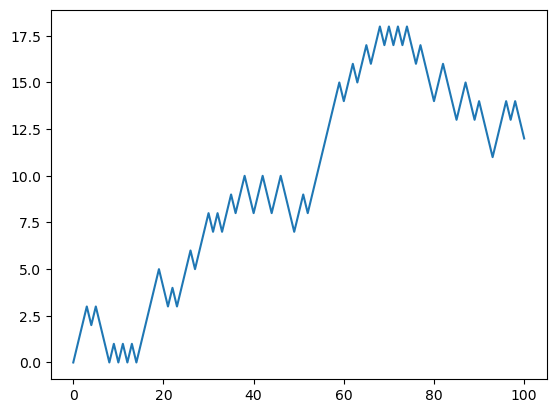

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(walk)

In [57]:
#Using numpy array we can do following
ranndrom_draw= np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a unif

In [58]:
random_walk= np.random.choice([1, -1], size = 100)

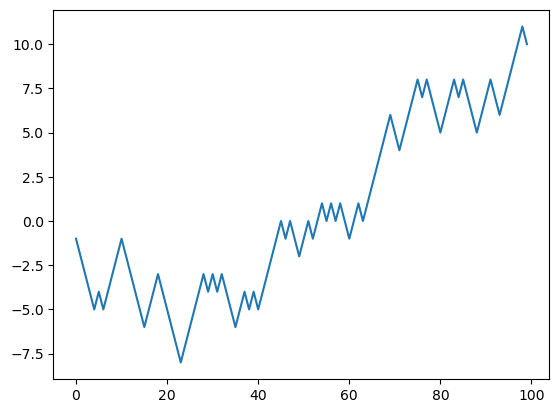

In [59]:
walk = random_walk.cumsum()
plt.plot(walk)

Also look into
- Broadcasting in numpy
- [Scipy Lecture Notes](https://www.scipy-lectures.org/)